In [172]:
import pyreadr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import scipy.stats as stats

# Problem 1

In [173]:
result = pyreadr.read_r('table.b3.rda')
df = next(iter(result.values()))
df

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11
rownames,,,,,,,,,,,,
1,18.90,350.0,165.0,260.0,8.00,2.56,4.0,3.0,200.3,69.9,3910.0,1.0
2,17.00,350.0,170.0,275.0,8.50,2.56,4.0,3.0,199.6,72.9,3860.0,1.0
3,20.00,250.0,105.0,185.0,8.25,2.73,1.0,3.0,196.7,72.2,3510.0,1.0
4,18.25,351.0,143.0,255.0,8.00,3.00,2.0,3.0,199.9,74.0,3890.0,1.0
5,20.07,225.0,95.0,170.0,8.40,2.76,1.0,3.0,194.1,71.8,3365.0,0.0
6,11.20,440.0,215.0,330.0,8.20,2.88,4.0,3.0,184.5,69.0,4215.0,1.0
7,22.12,231.0,110.0,175.0,8.00,2.56,2.0,3.0,179.3,65.4,3020.0,1.0
8,21.47,262.0,110.0,200.0,8.50,2.56,2.0,3.0,179.3,65.4,3180.0,1.0
9,34.70,89.7,70.0,81.0,8.20,3.90,2.0,4.0,155.7,64.0,1905.0,0.0


# a. Construct a normal probability plot of the residuals. Does there seem to be any problem with the normality assumption?



In [174]:
X = df[['x1', 'x6']]
Y = df['y']
X = sm.add_constant(X)
model = sm.OLS(Y, X)
results = model.fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     53.67
Date:                Sat, 22 Mar 2025   Prob (F-statistic):           1.79e-10
Time:                        15:53:41   Log-Likelihood:                -79.123
No. Observations:                  32   AIC:                             164.2
Df Residuals:                      29   BIC:                             168.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         32.8846      1.535     21.417      0.0

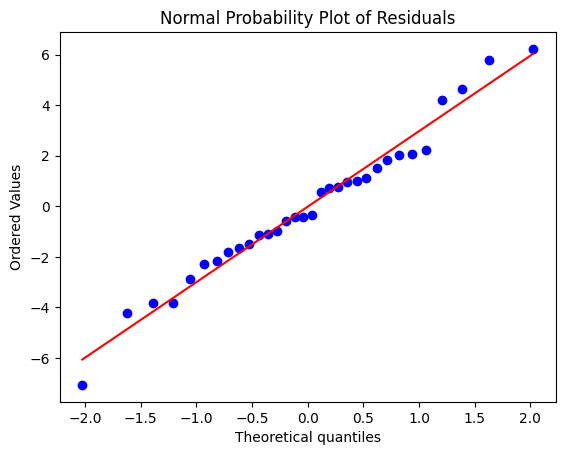

In [175]:
Y_hat = 32.8846 - 0.0531*df['x1'] + 0.9592*df['x6']
residuals = Y - Y_hat

# Construct a normal probability plot
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Normal Probability Plot of Residuals")
plt.show()

Residuals are independent and follow normal distribution 
# b. Construct and interpret a plot of the residuals versus the predicted response.


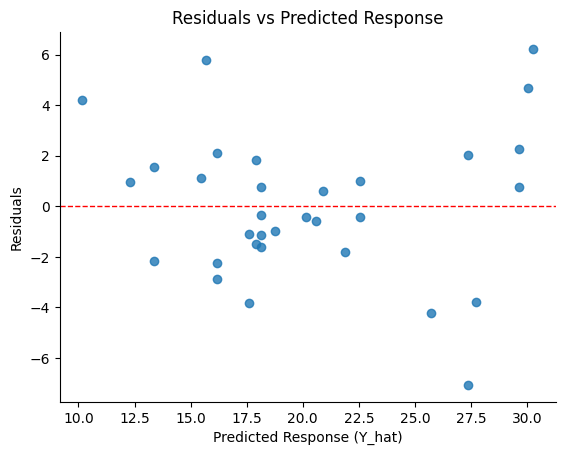

In [176]:
plt.scatter(Y_hat, residuals, alpha=0.8)
plt.axhline(y=0, color='r', linestyle='--', linewidth=1)
plt.xlabel("Predicted Response (Y_hat)")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Response")
plt.gca().spines[['top', 'right',]].set_visible(False)

Data points line randomly in the plot --> good model, constant variance  
# c. Construct and interpret the partial regression plots for this model.


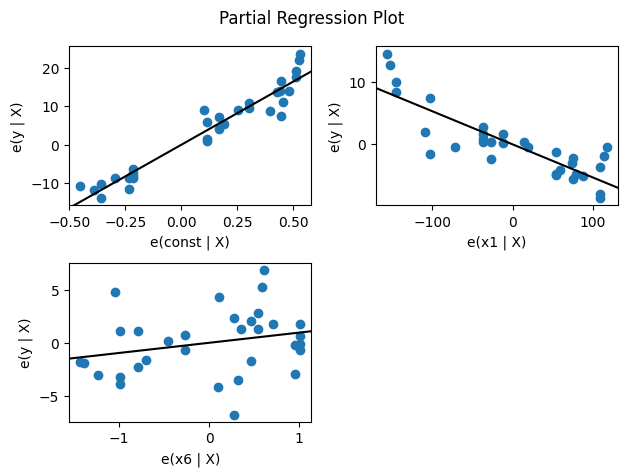

In [177]:
fig = sm.graphics.plot_partregress_grid(results)
fig.tight_layout(pad=1.0)

The intercept and x1 play a significant role while x6 have moderate role in the model  
# d. Compute the studentized residuals and the R-student residuals for this model. What information is conveyed by these scaled residuals?

In [178]:
from statsmodels.stats.outliers_influence import OLSInfluence

test_class = OLSInfluence(results)
dir(test_class)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_get_drop_vari',
 '_ols_xnoti',
 '_plot_index',
 '_res_looo',
 'aux_regression_endog',
 'aux_regression_exog',
 'cooks_distance',
 'cov_ratio',
 'det_cov_params_not_obsi',
 'dfbeta',
 'dfbetas',
 'dffits',
 'dffits_internal',
 'endog',
 'ess_press',
 'exog',
 'get_resid_studentized_external',
 'hat_diag_factor',
 'hat_matrix_diag',
 'influence',
 'k_vars',
 'model_class',
 'nobs',
 'params_not_obsi',
 'plot_index',
 'plot_influence',
 'resid',
 'resid_press',
 'resid_std',
 'resid_studentized',
 'resid_studentized_external',
 'resid_studentized_internal',
 'resid_var',
 'results',
 'scale',
 'sigma2_not_

In [179]:
import numpy.linalg as linalg

XtX = X.T.dot(X)
inv_XtX = linalg.inv(XtX)
inv_XtXXt = inv_XtX.dot(X.T)
beta_hat = inv_XtXXt.dot(Y)
hat_matrix = X.dot(inv_XtX.dot(X.T))
b = np.matmul(inv_XtXXt, Y)
J = np.ones((len(Y), len(Y)))
print(b)
SSR = b.T.dot(X.T.dot(Y)) - (1/len(Y))*Y.T.dot(J.dot(Y))
MSE = SSR/2

[32.88455083 -0.05314767  0.95922305]


In [ ]:
#studentized residuals using formula
std_resid = np.sqrt(sum(residuals**2)/(len(Y)-2))
r = residuals / std_resid*np.sqrt(1-np.diag(hat_matrix))
print(r)

rownames
1     0.245626
2    -0.365545
3    -0.179236
4     0.671425
5    -0.580075
6    -0.691473
7    -0.137777
8     0.191306
9     1.460813
10    0.233919
11   -0.526379
12    1.945420
13   -1.380531
14   -0.139463
15   -2.283286
16   -0.317123
17    1.320476
18    0.491217
19   -0.108209
20   -0.492022
21    0.331505
22    1.853519
23    0.357519
24    0.706552
25    0.656013
26    0.310533
27   -1.226484
28    0.591785
29   -0.729323
30   -0.932190
31   -1.235491
32   -0.356081
dtype: float64


In [ ]:
#check studentized residual with the library
print(test_class.resid_studentized_internal)

rownames
1     0.271788
2    -0.390056
3    -0.198011
4     0.731373
5    -0.640482
6    -0.746902
7    -0.137616
8     0.200727
9     1.667246
10    0.265648
11   -0.564225
12    2.234394
13   -1.444598
14   -0.153989
15   -2.449945
16   -0.325342
17    1.518656
18    0.543109
19   -0.111385
20   -0.512126
21    0.343837
22    2.027718
23    0.391788
24    0.799068
25    0.706877
26    0.350429
27   -1.323145
28    0.627428
29   -0.782291
30   -1.001512
31   -1.328160
32   -0.378551
dtype: float64


In [ ]:
#count studentized residuals
count = 0
for i in r:
    if i > 2 or i < -2:
        count+=1
print(count)

1


Probably there is an outlier needed to check

In [ ]:
#r-studentized residuals using formula
s_i = std_resid*np.sqrt(1-np.diag(hat_matrix))
t = residuals/s_i*np.sqrt(1-np.diag(hat_matrix))
print(t)

rownames
1     0.257780
2    -0.383632
3    -0.192019
4     0.703899
5    -0.616532
6    -0.728307
7    -0.140739
8     0.195529
9     1.573171
10    0.250620
11   -0.552425
12    2.101951
13   -1.425589
14   -0.149888
15   -2.386390
16   -0.326377
17    1.424137
18    0.517383
19   -0.113564
20   -0.508809
21    0.338632
22    1.952256
23    0.374247
24    0.756998
25    0.685636
26    0.329011
27   -1.285808
28    0.611975
29   -0.764597
30   -0.977276
31   -1.294775
32   -0.373167
dtype: float64


In [ ]:
#check r-studentized residual with the library
print(test_class.resid_studentized_external)

rownames
1     0.267402
2    -0.384281
3    -0.194698
4     0.725373
5    -0.633841
6    -0.741073
7    -0.135267
8     0.197373
9     1.722900
10    0.261346
11   -0.557480
12    2.413045
13   -1.473479
14   -0.151373
15   -2.703289
16   -0.320268
17    1.555372
18    0.536397
19   -0.109471
20   -0.505510
21    0.338547
22    2.150743
23    0.385996
24    0.793959
25    0.700645
26    0.345066
27   -1.341247
28    0.620743
29   -0.776927
30   -1.001566
31   -1.346659
32   -0.372889
dtype: float64


In [ ]:
#count the R-student residuals
count = 0
for i in t:
    if i > 3 or i < -3:
        count+=1
print(count)


0


There is no point that is a strong outlier and may need further investigation

# Problem 2

In [136]:
result = pyreadr.read_r('p2.14.rda')
df = next(iter(result.values()))
df

,ratio,visc
rownames,,
1,1.0,0.45
2,0.9,0.20
3,0.8,0.34
4,0.7,0.58
5,0.6,0.70
6,0.5,0.57
7,0.4,0.55
8,0.3,0.44


# a. Construct a normal probability plot of the unscaled residuals. Does there seem to be any problem with the normality assumption?


In [137]:
X = df[['visc']]
Y = df['ratio']
X = sm.add_constant(X)
model = sm.OLS(Y, X)
results = model.fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                  ratio   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     1.640
Date:                Sat, 22 Mar 2025   Prob (F-statistic):              0.248
Time:                        15:37:26   Log-Likelihood:                 1.4031
No. Observations:                   8   AIC:                             1.194
Df Residuals:                       6   BIC:                             1.353
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9968      0.283      3.520      0.0

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=8 observations were given.
  return hypotest_fun_in(*args, **kwds)


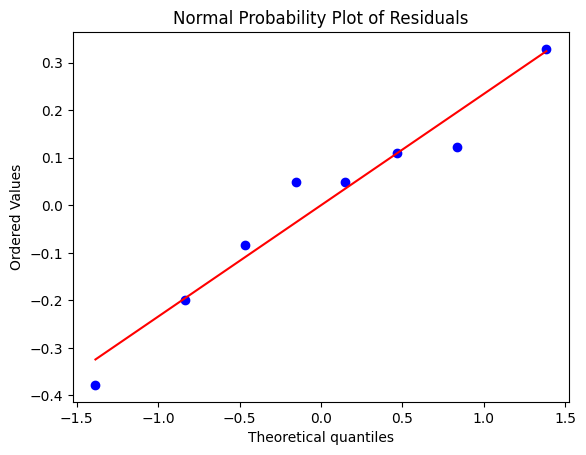

In [138]:
Y_hat = 0.9968 - 0.7243*df['visc']
residuals = Y - Y_hat

# Construct a normal probability plot
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Normal Probability Plot of Residuals")
plt.show()

Since there are too little data, we can't clearly predict about the model, in this case, the variance of the model may be dependent
# b. Repeat part a using the studentized residuals. Is there any substantial difference in the two plots?


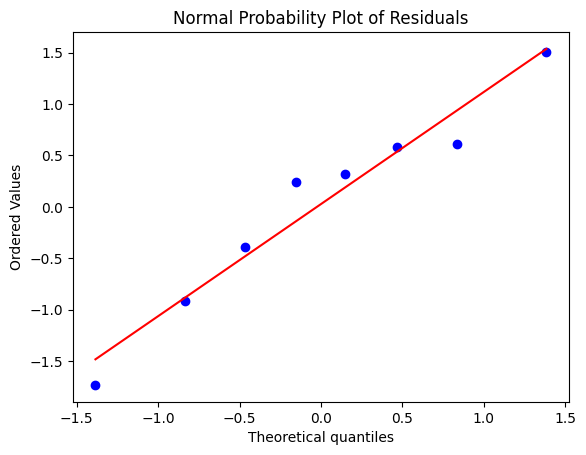

In [139]:
test_class = OLSInfluence(results)
stats.probplot(test_class.resid_studentized, dist="norm", plot=plt)
plt.title("Normal Probability Plot of Residuals")
plt.show()

There is no substantial difference in the two plots
# c. Construct and interpret a plot of the residuals versus the predicted response.

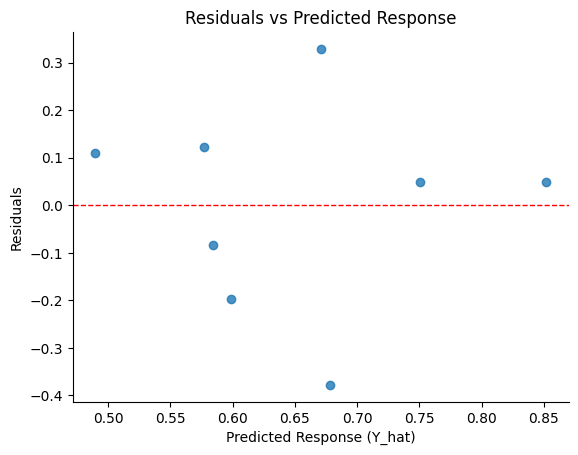

In [140]:
plt.scatter(Y_hat, residuals, alpha=0.8)
plt.axhline(y=0, color='r', linestyle='--', linewidth=1)
plt.xlabel("Predicted Response (Y_hat)")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Response")
plt.gca().spines[['top', 'right',]].set_visible(False)

Data points line randomly in the plot --> good model, constant variance  